In [1]:
# standard DS imports
import pandas as pd
import numpy as np

# viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# scaling and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# local functions
import wrangle
import model

# to get iris data
from pydataset import data

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')

a. Choose features other than the ones used in the lesson.

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
iris = iris.drop(columns='Species')

In [6]:
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris)

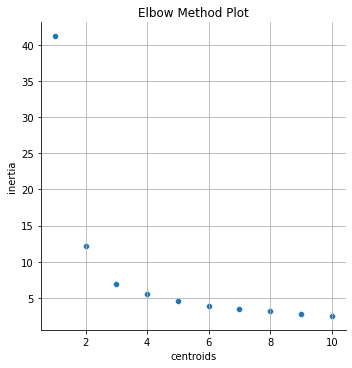

In [7]:
model.run_kmeans(iris_scaled, 10)

In [8]:
# 3 clusters look like the magic amount...

b. Visualize the results of your clustering.

In [9]:
km = KMeans(n_clusters = 3)
km.fit(iris_scaled)
iris['cluster'] = km.predict(iris_scaled)

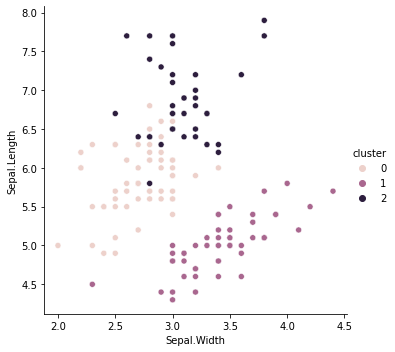

In [10]:
sns.relplot(data = iris, x='Sepal.Width', y='Sepal.Length', hue = 'cluster')

c. Use the elbow method to visually select a good value for k.

In [11]:
# see above

d. Repeat the clustering, this time with 3 different features.

In [12]:
iris_small = iris.drop(columns=['cluster','Petal.Width'])

In [13]:
scaler = MinMaxScaler()
iris_small_scaled = scaler.fit_transform(iris_small)

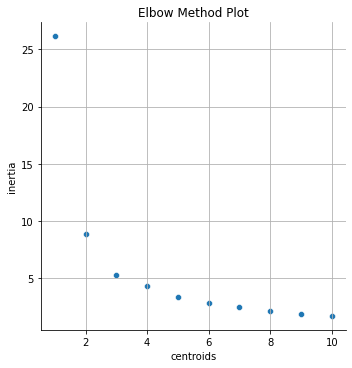

In [14]:
model.run_kmeans(iris_small_scaled, 10)

In [17]:
# 3 is the winner again

In [15]:
km = KMeans(n_clusters = 3)
km.fit(iris_small_scaled)
iris_small['cluster'] = km.predict(iris_small_scaled)

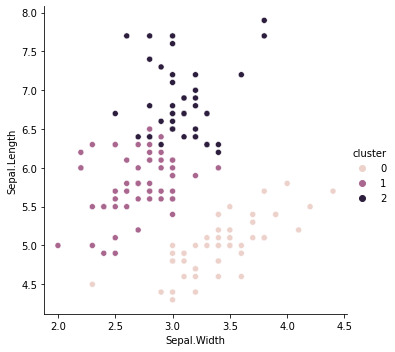

In [16]:
sns.relplot(data = iris_small, x='Sepal.Width', y='Sepal.Length', hue = 'cluster')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [18]:
mall = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/2388559aef7a0700eb31e7604351364b16e99653/mall_customers.csv', index_col="customer_id")

In [19]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [20]:
train = mall.drop(columns='gender')

In [21]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

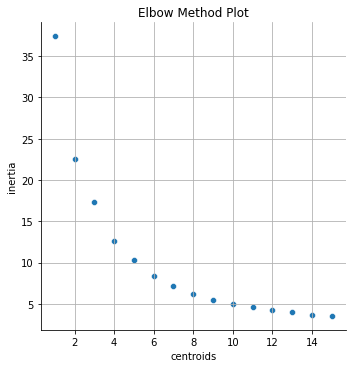

In [22]:
model.run_kmeans(train_scaled, 15)

In [23]:
# 5 is best

In [24]:
km = KMeans(n_clusters = 5)
km.fit(train_scaled)
train['clusters'] = km.predict(train_scaled)

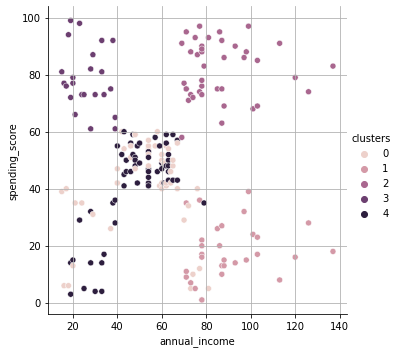

In [30]:
sns.relplot(data=train, x='annual_income', y='spending_score', hue='clusters')
plt.plot(marker='x')
plt.grid()
plt.show()

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [31]:
km = KMeans(n_clusters = 5)
km.fit(train)
train['clusters'] = km.predict(train)

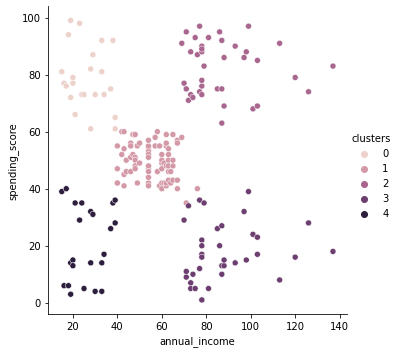

In [32]:
sns.relplot(data=train, x='annual_income', y='spending_score', hue='clusters')

In [33]:
# groups them very differently, clustering on unscaled data was more visually understandable. 